In [3]:
!pip list

Package                         Version


------------------------------- -----------
absl-py                         1.4.0
aiobotocore                     2.5.0
aiohttp                         3.8.4
aioitertools                    0.11.0
aiosignal                       1.3.1
anyio                           3.6.2
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
arrow                           1.2.3
asttokens                       2.2.1
astunparse                      1.6.3
async-timeout                   4.0.2
attrs                           22.2.0
backcall                        0.2.0
beautifulsoup4                  4.11.2
bleach                          6.0.0
boltons                         23.0.0
botocore                        1.29.76
brotlipy                        0.7.0
cachetools                      5.3.0
certifi                         2023.5.7
cffi                            1.15.1
charset-normalizer              2.0.4
colorama                        0.4.6
comm                           

In [4]:
import pandas as pd

In [5]:
masses_data = pd.read_csv('C:/Users/Amrita/Downloads/mammographic_masses.data.txt')

In [6]:

masses_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [7]:
masses_data.describe()

,1
count,960.000000
mean,0.462500
std,0.498852
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [8]:
#using the optional parmaters in read_csv to convert missing data  into NaN, and to add the appropriate column names (BI_RADS, age, shape, margin, density, and severity)

In [9]:
masses_data = pd.read_csv('mammographic_masses.data.txt', na_values=['?'], names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [10]:
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [11]:
#before droping rows with missing value need to check that no bias in data in present and also if any corelation is there or not

In [12]:
masses_data.loc[(masses_data['age'].isnull()) |
              (masses_data['shape'].isnull()) |
              (masses_data['margin'].isnull()) |
              (masses_data['density'].isnull())]

,BI-RADS,age,shape,margin,density,severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


In [13]:
#above we can see missing data is in random format. no correlation is observed. hence , using dropna()

In [14]:
masses_data.dropna(inplace=True)
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [15]:
fig, axes = plt.subplots(1,4, sharey=False, figsize=(18,4))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.hist(masses_data['age'], bins=10, color="lightgreen")
ax2.hist(masses_data['shape'], bins=4, color="red")
ax3.hist(masses_data['margin'], bins=5, color="mediumslateblue")
ax4.hist(masses_data['density'], bins=4, color="yellow")
ax1.set_xlabel('AGE', fontsize="large")
ax2.set_xlabel('SHAPE', fontsize="large")
ax3.set_xlabel('MARGIN', fontsize="large")
ax4.set_xlabel('DENSITY', fontsize="large")
ax1.set_ylabel("AMOUNT", fontsize="large")

plt.suptitle('COMPARISON of DISTRIBUTIONS', ha='center', fontsize='x-large')
plt.show()

NameError: name 'plt' is not defined

#now need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Creating an array that extracts only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity).also one more array of the feature name labels.

In [16]:
all_features = masses_data[['age', 'shape',
                             'margin', 'density']].values


all_classes = masses_data['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

all_features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [17]:
#as Some of the models require the input data to be normalized, hence using preprocessing.StandardScaler().

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
!pip install scikit-learn

In [20]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

In [21]:
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [22]:
#creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [23]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, train_size=0.75, random_state=1)

In [24]:
# using DecisionTreeClassifier to fit training data

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
clf.fit(training_inputs, training_classes)

DecisionTreeClassifier(random_state=1)

In [26]:

y_pred = clf.predict(testing_inputs)
print(y_pred)

[0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0
 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1
 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0
 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0
 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0]


In [27]:
print(clf.score(testing_inputs, testing_classes))

0.7355769230769231


In [28]:
confusion_matrix(testing_classes,y_pred)

array([[88, 31],
       [24, 65]], dtype=int64)

In [29]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

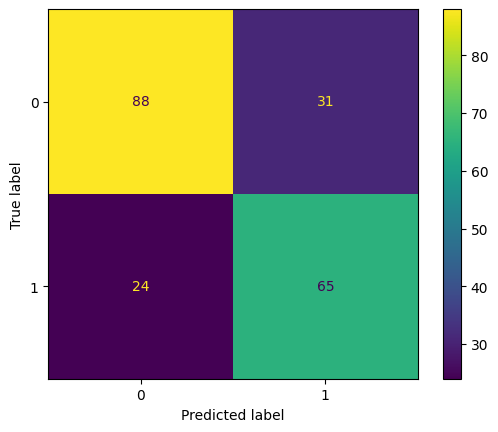

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = clf.predict(testing_inputs)
cm = confusion_matrix(testing_classes,y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

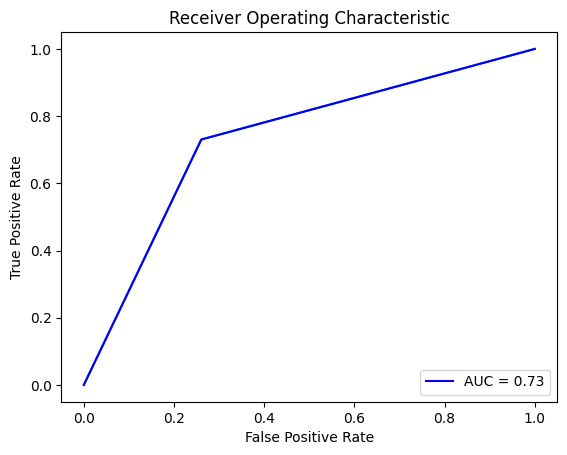

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

    
fpr, tpr, _ = roc_curve(testing_classes, y_pred, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_auc = metrics.auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')

In [32]:
!pip install six

In [33]:


!pip install pydotplus

In [34]:
!pip install graphviz

In [35]:
conda install graphviz

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Amrita\miniconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1u             |       h2bbff1b_0         5.5 MB
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

  openssl                                 1.1.1t-h2bbff1b_0 --> 1.1.1u-h2bbff1b_0 




openssl-1.1.1u       | 5.5 MB    |            |   0% 
openssl-1.1.1u       | 5.5 MB    |            |   0% 
openssl-1.1.1u       | 5.5 MB    |            |   1% 
openssl-1.1.1u       | 5.5 MB    |            |   1% 
openssl-1.1.1u       | 5.5 MB    | 2          |   3% 
openssl-1.1.1u       | 5.5 MB    | 3          |   4% 
openssl-1.1.1u

In [36]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

In [37]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

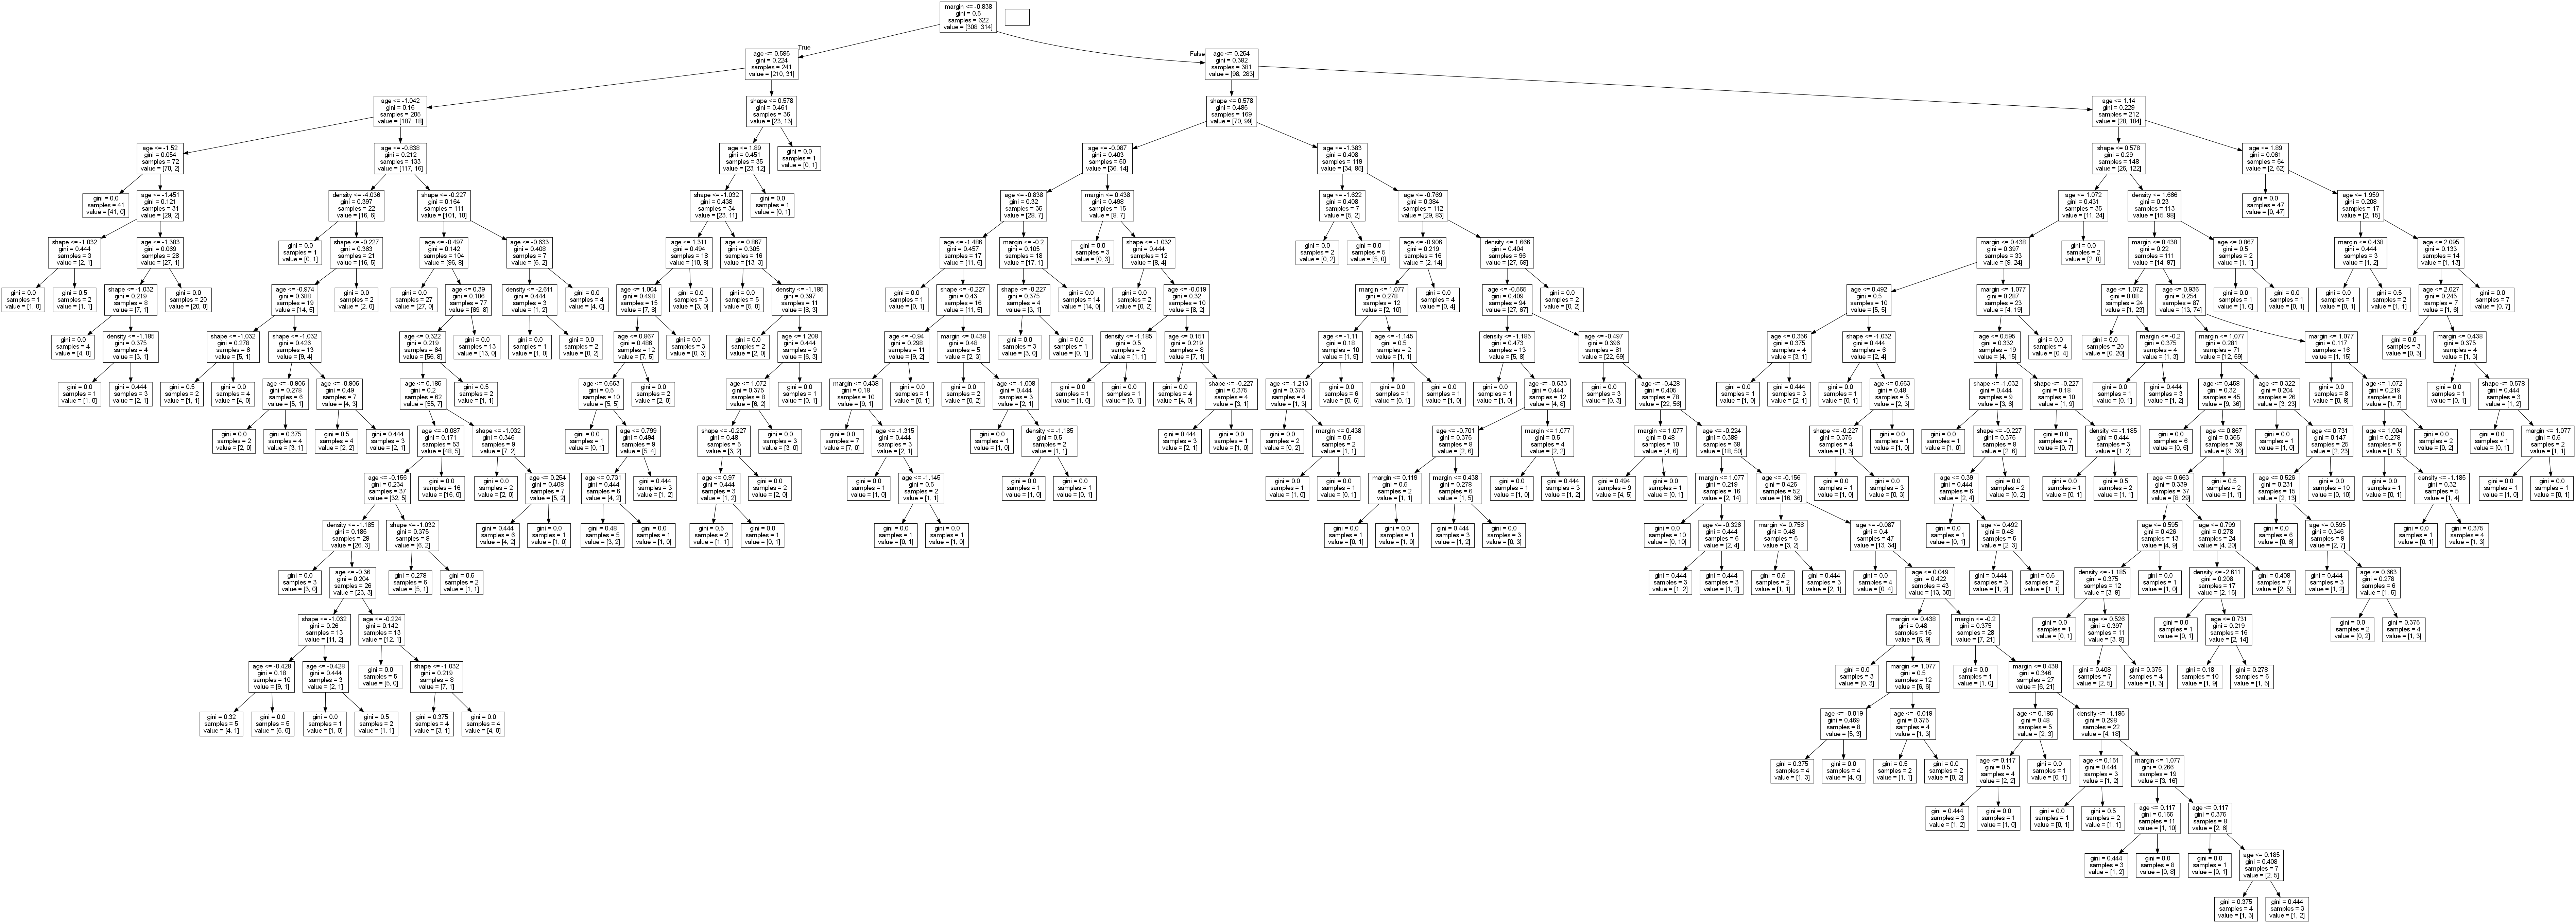

In [38]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.externals.six import StringIO
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [39]:
clf.score(testing_inputs, testing_classes)

0.7355769230769231

In [40]:
import matplotlib.pyplot as plt

In [41]:
from sklearn import metrics

# ROC curve
# we use Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality using cross-validation

def createROC(testing_classes, y_pred):
    
    
    fpr, tpr, thresholds = metrics.roc_curve(testing_classes, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f%%'% (roc_auc*100))
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    plt.show()

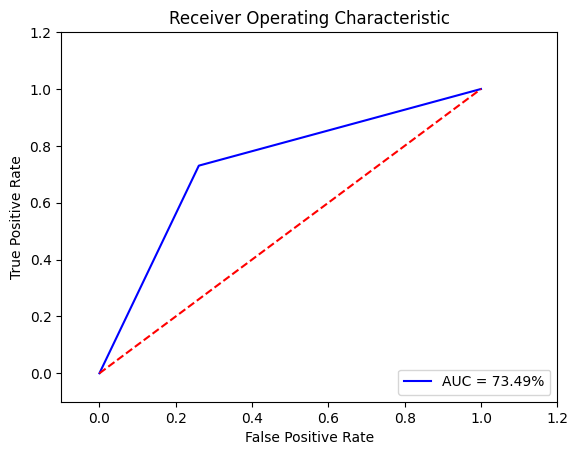

In [42]:
createROC(testing_classes, y_pred)

In [43]:
#Now instead of a single train/test split, using K-Fold cross validation to get a better measure of model's accuracy (K=10). using model_selection.cross_val_score

In [125]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1)

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7373493975903613

In [126]:
#RandomForestClassifier

In [127]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=1)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7421686746987952

In [128]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.74 (+/- 0.08)


KNN-using neighbors.KNeighborsClassifier - Starting with a K of 10. K is an example of a hyperparameter - a parameter on the model itself which may need to be tuned for best results on a particular data set.

In [129]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7927710843373494

As choosing K is a bit tricky, so trying different values of K. Writing a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference.

In [130]:
for n in range(1, 50):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.7228915662650601
2 0.6855421686746987
3 0.7530120481927711
4 0.7385542168674699
5 0.7783132530120482
6 0.7650602409638554
7 0.7975903614457832
8 0.7819277108433734
9 0.7927710843373493
10 0.7927710843373494
11 0.7951807228915662
12 0.7843373493975905
13 0.7843373493975904
14 0.7855421686746988
15 0.7855421686746988
16 0.7831325301204819
17 0.7867469879518072
18 0.7783132530120482
19 0.7855421686746988
20 0.7843373493975904
21 0.7867469879518072
22 0.783132530120482
23 0.7795180722891566
24 0.7771084337349399
25 0.7855421686746988
26 0.7831325301204819
27 0.7843373493975904
28 0.7843373493975904
29 0.7867469879518072
30 0.7843373493975904
31 0.7867469879518072
32 0.789156626506024
33 0.7867469879518072
34 0.789156626506024
35 0.7843373493975904
36 0.7867469879518072
37 0.7831325301204819
38 0.7867469879518072
39 0.7819277108433734
40 0.7843373493975904
41 0.7819277108433734
42 0.7831325301204819
43 0.7831325301204819
44 0.7843373493975904
45 0.7831325301204819
46 0.7831325301204819


In [131]:
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

Accuracy: 0.79 (+/- 0.07)


Naive Bayes
Now trying naive_bayes.MultinomialNB.

In [132]:
from sklearn.naive_bayes import MultinomialNB

scaler = preprocessing.MinMaxScaler()
all_features_minmax = scaler.fit_transform(all_features)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, all_features_minmax, all_classes, cv=10)

cv_scores.mean()

0.7855421686746988

SVM
using svm.SVC with a linear kernel.

In [133]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C)

In [134]:
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7975903614457832

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Trying the rbf, sigmoid, and poly kernels and see what the best-performing kernel is.

In [135]:
# Build the model SVM-Poly kernel
svc = svm.SVC(kernel='poly', C=1, gamma='scale')

# Fit the model
svc = svc.fit(training_inputs,training_classes)

# Predict the results
y_pred = svc.predict(testing_inputs)

# Evaluates the accuracy of our prediction on the test set
scores = model_selection.cross_val_score(svc,all_features_scaled, all_classes, cv=10)
print(scores)
# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
models=[] 
model = {}
model['label'] = 'SVM - Poly Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score(testing_classes, y_pred)
models.append(model)


[0.75903614 0.79518072 0.84337349 0.80722892 0.8313253  0.73493976
 0.74698795 0.79518072 0.84337349 0.74698795]
Accuracy: 0.79 (+/- 0.08)


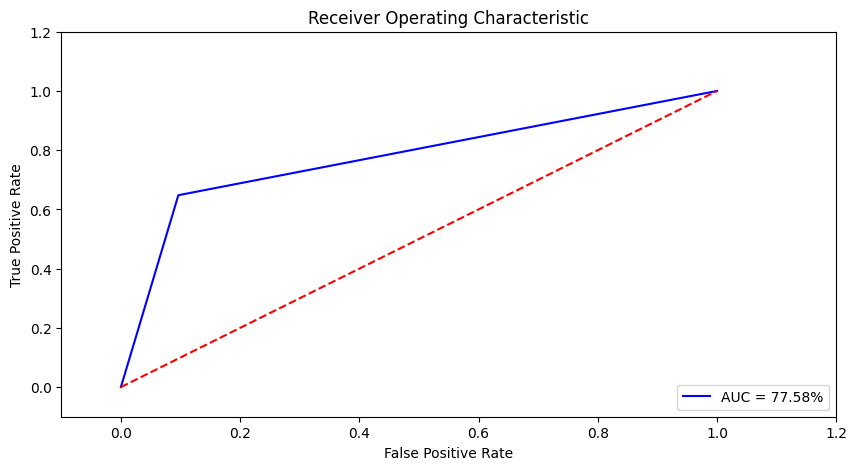

In [136]:
createROC(y_pred, testing_classes)

In [137]:
C = 1.0
svc = svm.SVC(kernel='rbf', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.8012048192771084

In [138]:

# Fit the model
svc = svc.fit(training_inputs,training_classes)

# Predict the results
y_pred = svc.predict(testing_inputs)


# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
models=[] 
model = {}
model['label'] = 'SVM - Sigmoid Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score( testing_classes, y_pred)
models.append(model)


Accuracy: 0.80 (+/- 0.08)


In [139]:
C = 1.0
svc = svm.SVC(kernel='sigmoid', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7457831325301204

In [140]:


# Fit the model
svc = svc.fit(training_inputs,training_classes)

# Predict the results
y_pred = svc.predict(testing_inputs)


# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

## Adding the results to a new dictionary to compare at the end
models=[] 
model = {}
model['label'] = 'SVM - Sigmoid Kernel'
model['pred'] = y_pred
model['acc'] = accuracy_score( testing_classes, y_pred)

models.append(model)
#print(models)

Accuracy: 0.75 (+/- 0.08)


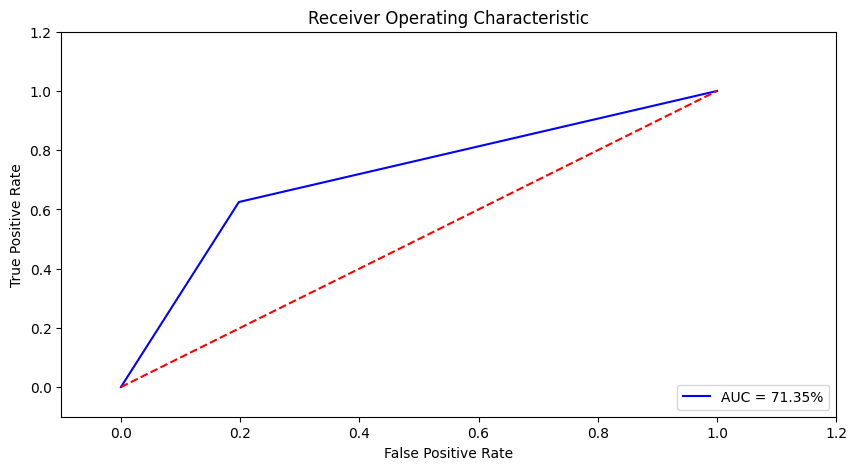

In [141]:
createROC(y_pred,testing_classes)

In [142]:
C = 1.0
svc = svm.SVC(kernel='poly', C=C)
cv_scores = cross_val_score(svc, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.7903614457831326

In [143]:
#Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
cv_scores.mean()

0.8072289156626505

In [157]:

# The mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

## Adding the results to a new dictionary to compare at the end

model = {}
model['label'] = 'Logistic Regression'
model['pred'] = y_pred
model['acc'] = accuracy_score(testing_classes, y_pred)
models.append(model)

Accuracy: 0.80 (+/- 0.11)


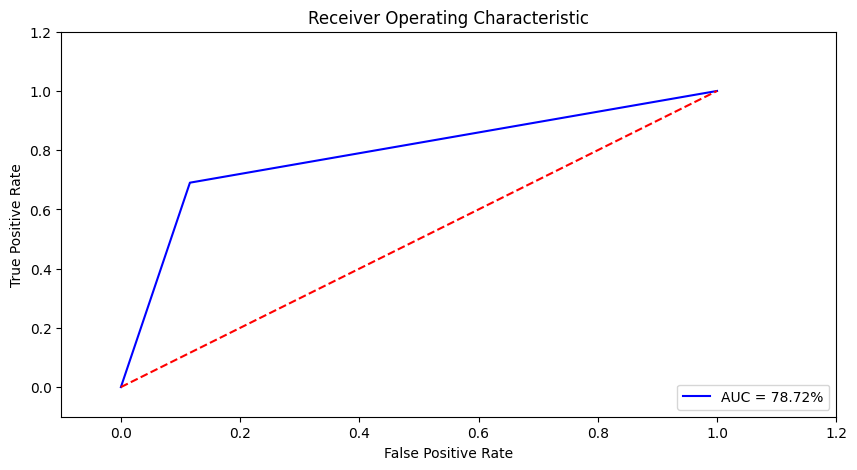

In [158]:
createROC(y_pred, testing_classes)

Neural Networks
trying artificial neural network atlast.. using Keras to set up a neural network with 1 binary output neuron and see how it performs

In [159]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    # "Deep learning" turns out to be unnecessary - this additional hidden layer doesn't help either.
    #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; adam seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [160]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
cv_scores.mean()


C:\Users\Amrita\AppData\Local\Temp\ipykernel_14832\2792759154.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)


0.8024096369743348

In [161]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
ann = Sequential()

ann.add(Dense(128, input_dim=4, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(64, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(32, kernel_initializer='normal', activation='relu'))
ann.add(Dropout(0.2))

ann.add(Dense(16, kernel_initializer='normal', activation='relu'))
ann.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

ann.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = ann.fit(training_inputs, training_classes, batch_size=10, epochs=100, verbose=2)

Epoch 1/100
63/63 - 1s - loss: 0.6850 - accuracy: 0.6833 - 1s/epoch - 17ms/step
Epoch 2/100
63/63 - 0s - loss: 0.5180 - accuracy: 0.8055 - 140ms/epoch - 2ms/step
Epoch 3/100
63/63 - 0s - loss: 0.4532 - accuracy: 0.8103 - 138ms/epoch - 2ms/step
Epoch 4/100
63/63 - 0s - loss: 0.4467 - accuracy: 0.8135 - 142ms/epoch - 2ms/step
Epoch 5/100
63/63 - 0s - loss: 0.4513 - accuracy: 0.8087 - 140ms/epoch - 2ms/step
Epoch 6/100
63/63 - 0s - loss: 0.4497 - accuracy: 0.8183 - 139ms/epoch - 2ms/step
Epoch 7/100
63/63 - 0s - loss: 0.4346 - accuracy: 0.8167 - 140ms/epoch - 2ms/step
Epoch 8/100
63/63 - 0s - loss: 0.4429 - accuracy: 0.8183 - 141ms/epoch - 2ms/step
Epoch 9/100
63/63 - 0s - loss: 0.4416 - accuracy: 0.8199 - 157ms/epoch - 2ms/step
Epoch 10/100
63/63 - 0s - loss: 0.4452 - accuracy: 0.8232 - 143ms/epoch - 2ms/step
Epoch 11/100
63/63 - 0s - loss: 0.4376 - accuracy: 0.8199 - 141ms/epoch - 2ms/step
Epoch 12/100
63/63 - 0s - loss: 0.4480 - accuracy: 0.8280 - 138ms/epoch - 2ms/step
Epoch 13/100
63

In [163]:
# Evaluates the accuracy of our prediction on the test set
score = ann.evaluate(testing_inputs, testing_classes, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# Predict the results
y_pred = ann.predict(testing_inputs)

## Adding the results to a new dictionary to compare at the end

model = {}
model['label'] = 'ANN - Artificial Neural Network'
model['pred'] = y_pred
model['acc'] = metrics.roc_auc_score(testing_classes, y_pred)#accuracy_score(y_test, y_pred)

models.append(model)
#print(models)

Test Loss: 0.5056726336479187
Test Accuracy: 0.7692307829856873
7/7 [==============================] - 0s 3ms/step


BEST MODEL in terms of accuracy....

except decision trees , other algorithms could be tuned to produce comparable results with 79-80% accuracy.
Additional hyperparameter tuning, or different topologies of the multi-level perceptron might make a difference.will continue to work on it.

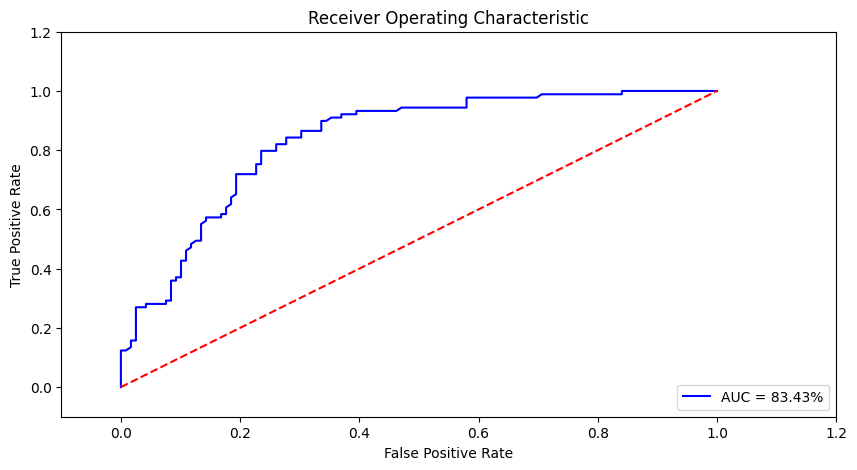

In [164]:
createROC(testing_classes, y_pred)



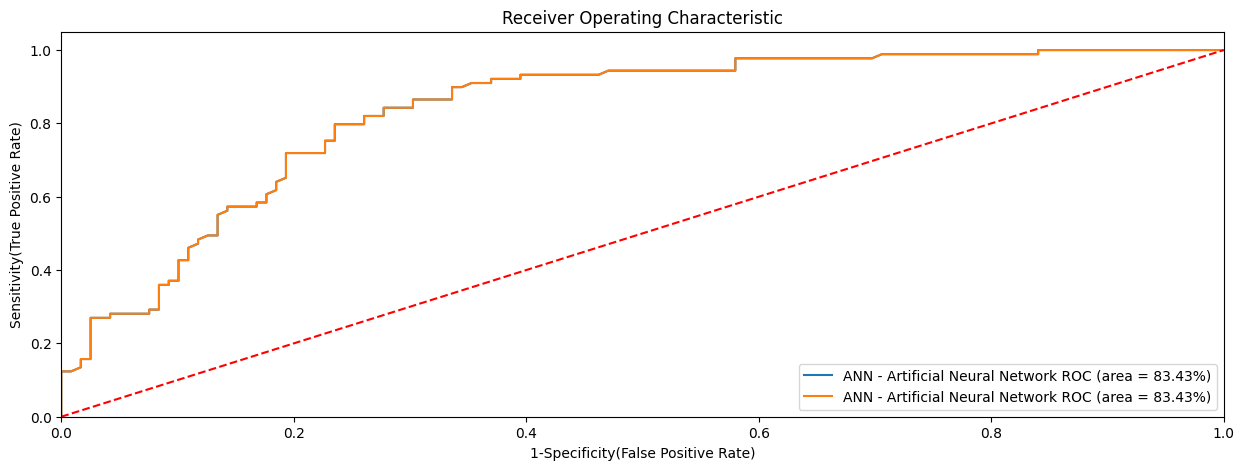

In [165]:
## CReate graph comparaison between classifiers

## ROC curves for all classifiers 

plt.figure(figsize = (15, 5))

for m in models:
    mod = m['label']
    y_pred = m['pred']
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(testing_classes, y_pred)
    # Calculate Accuracy of the curve to display on the plot
    auc = metrics.auc(fpr, tpr)#metrics.roc_auc_score(y_test, y_pred)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f%%)' % (m['label'], auc*100))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# Display
plt.show()   

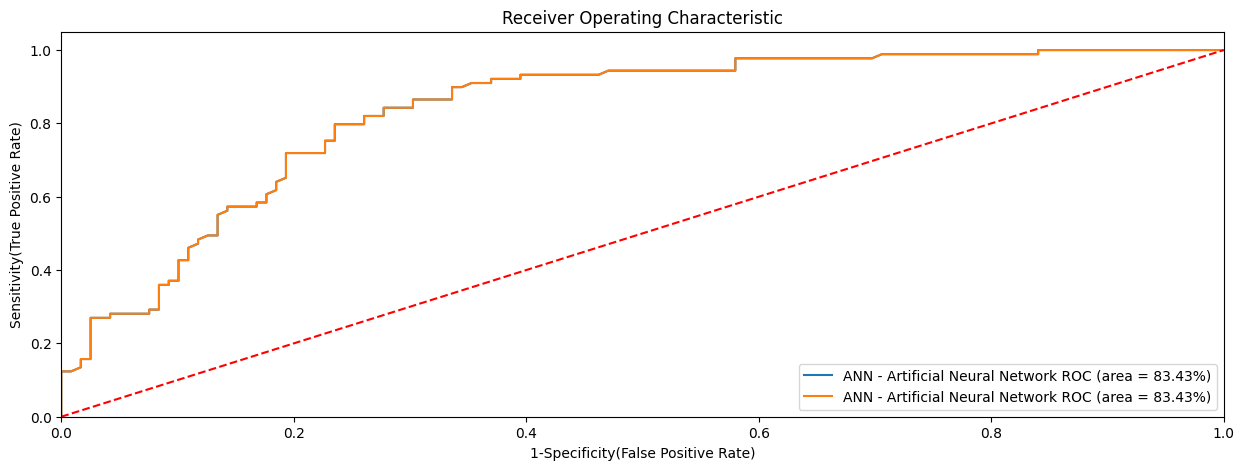

In [166]:
## CReate graph comparaison between classifiers

## ROC curves for all classifiers 

plt.figure(figsize = (15, 5))

for m in models:
    mod = m['label']
    y_pred = m['pred']
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(testing_classes, y_pred)
    # Calculate Accuracy of the curve to display on the plot
    auc = metrics.auc(fpr, tpr)#metrics.roc_auc_score(testing_classes, y_pred)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f%%)' % (m['label'], auc*100))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# Display
plt.show()



In [121]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dicti={SVC(kernel="rbf", C=1, gamma=1000, probability=True):"svc",
    LogisticRegression(solver="liblinear", random_state=0):"lr",
    KNeighborsClassifier(n_neighbors=10):'knn',
    RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0):'rfc',
    DecisionTreeClassifier(random_state=0):'dtc'}
for model in dicti:
    model.fit(training_inputs,training_classes)
    pred_c=model.predict(testing_inputs)
    accc=accuracy_score(testing_classes, pred_c)
    print("Accuracy score for ", dicti[model], " is ", accc.round(2))

Accuracy score for  svc  is  0.62
Accuracy score for  lr  is  0.78
Accuracy score for  knn  is  0.77
Accuracy score for  rfc  is  0.76
Accuracy score for  dtc  is  0.73


In [122]:
from sklearn.model_selection import cross_val_score
for model in dicti:
    score=cross_val_score(model,all_features_scaled,all_classes, cv=10)
    print("Accuracy score for ", dicti[model], "with cros. val. is ",'{:3.2f}'.format(score.mean()))

Accuracy score for  svc with cros. val. is  0.71
Accuracy score for  lr with cros. val. is  0.81
Accuracy score for  knn with cros. val. is  0.79
Accuracy score for  rfc with cros. val. is  0.80
Accuracy score for  dtc with cros. val. is  0.73


In [123]:
#again LR is winner with cross-validation

In [97]:
from sklearn.neighbors import KNeighborsClassifier
for n in range(1,11):
    model=KNeighborsClassifier(n_neighbors=n)
    model.fit(training_inputs,training_classes)
    pred_c=model.predict(testing_inputs)
    acc=accuracy_score(testing_classes, pred_c)
    print(n,"neighbor(s):")
    print("Accuracy score for KNN is :", acc.round(2))
    score=cross_val_score(model,training_inputs,training_classes, cv=10)
    print("Accuracy score for KNN with cros. val. is ",'{:3.2f}'.format(score.mean()),"\n")

1 neighbor(s):
Accuracy score for KNN is : 0.73
Accuracy score for KNN with cros. val. is  0.69 

2 neighbor(s):
Accuracy score for KNN is : 0.75
Accuracy score for KNN with cros. val. is  0.66 

3 neighbor(s):
Accuracy score for KNN is : 0.75
Accuracy score for KNN with cros. val. is  0.76 

4 neighbor(s):
Accuracy score for KNN is : 0.74
Accuracy score for KNN with cros. val. is  0.74 

5 neighbor(s):
Accuracy score for KNN is : 0.77
Accuracy score for KNN with cros. val. is  0.78 

6 neighbor(s):
Accuracy score for KNN is : 0.76
Accuracy score for KNN with cros. val. is  0.78 

7 neighbor(s):
Accuracy score for KNN is : 0.78
Accuracy score for KNN with cros. val. is  0.79 

8 neighbor(s):
Accuracy score for KNN is : 0.77
Accuracy score for KNN with cros. val. is  0.80 

9 neighbor(s):
Accuracy score for KNN is : 0.78
Accuracy score for KNN with cros. val. is  0.80 

10 neighbor(s):
Accuracy score for KNN is : 0.77
Accuracy score for KNN with cros. val. is  0.80 



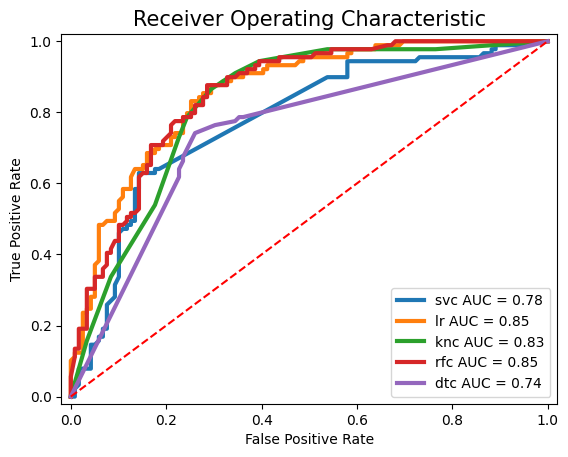

In [124]:
from sklearn.metrics import roc_curve, auc
dicti={SVC(kernel="rbf", C=1, gamma=1000, probability=True):"svc",
    LogisticRegression(solver="liblinear", random_state=0):"lr",
    KNeighborsClassifier(n_neighbors=10):'knc',
    RandomForestClassifier(max_depth=3, n_estimators=100):'rfc',
    DecisionTreeClassifier():'dtc'}
for model in dicti:
    model.fit(training_inputs,training_classes)
    prob=model.predict_proba(testing_inputs)
    fpr, tpr, thresholds=roc_curve(testing_classes, prob[:,1])
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, label=dicti[model]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic', fontsize=15)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()